In [1]:
!nvidia-smi

Tue Sep 24 07:40:19 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.100 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 32.6/235.7 GB disk)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls


drive


In [5]:
%cd /content/drive/MyDrive/CerviCure.v2i.yolov8
from ultralytics import YOLO

model = YOLO('yolov8m.pt')

layer_index = 0
for param in model.parameters():
    if layer_index == 1:
        param.requires_grad = True
    else:
        param.requires_grad = False
    layer_index += 1

for layer in model.model.children():
    for param in layer.parameters():
        param.requires_grad = True

model.train(
    data='data.yaml',
    epochs=20,
    batch=16,
    imgsz=640,
    optimizer='Adam',
    lr0=0.001,
    weight_decay=0.0005
)


results = model.val()
print(results)


/content/drive/MyDrive/CerviCure.v2i.yolov8
Ultralytics YOLOv8.2.100 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_label

100%|██████████| 755k/755k [00:00<00:00, 111MB/s]


Overriding model.yaml nc=80 with nc=9

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

train: Scanning /content/drive/MyDrive/CerviCure.v2i.yolov8/train/labels.cache... 2923 images, 27 backgrounds, 0 corrupt: 100%|██████████| 2933/2933 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/CerviCure.v2i.yolov8/train/images/097_02_bmp.rf.5e19fa1f1b0e27b7fa4c651f1f0ee4c5.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/MyDrive/CerviCure.v2i.yolov8/train/images/259_01_bmp.rf.08b99bda38959dfb4a1902e2c29041b2.jpg: 1 duplicate labels removed


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.16 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/CerviCure.v2i.yolov8/valid/labels.cache... 835 images, 4 backgrounds, 0 corrupt: 100%|██████████| 835/835 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/CerviCure.v2i.yolov8/valid/images/101_04_bmp.rf.235f6229fc65f2b2ed625672ef667f14.jpg: 1 duplicate labels removed


Plotting labels to runs/detect/train8/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train8
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      6.79G     0.7104      1.618       1.34         13        640: 100%|██████████| 184/184 [02:42<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:49<00:00,  1.82s/it]

                   all        835       1561      0.317       0.65      0.453      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      6.79G     0.6792      1.319      1.304         17        640: 100%|██████████| 184/184 [01:32<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.41it/s]

                   all        835       1561       0.53      0.499      0.404       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      6.85G     0.6346      1.206      1.294         10        640: 100%|██████████| 184/184 [01:32<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.41it/s]


                   all        835       1561      0.578      0.597      0.531      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      6.92G     0.6581      1.178       1.29         16        640: 100%|██████████| 184/184 [01:31<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.39it/s]

                   all        835       1561      0.583      0.605      0.587      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20       6.9G     0.6251      1.119      1.281         15        640: 100%|██████████| 184/184 [01:31<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.42it/s]

                   all        835       1561      0.642      0.631      0.597      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      6.86G     0.5939      1.067      1.262         17        640: 100%|██████████| 184/184 [01:31<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.41it/s]

                   all        835       1561      0.543      0.649      0.583       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      6.88G     0.6308      1.033      1.277         17        640: 100%|██████████| 184/184 [01:31<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.41it/s]

                   all        835       1561      0.621      0.684      0.598      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      6.91G     0.6134      1.004      1.264         46        640: 100%|██████████| 184/184 [01:31<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.42it/s]

                   all        835       1561       0.65      0.684      0.645      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      6.95G     0.5713     0.9463      1.238         16        640: 100%|██████████| 184/184 [01:31<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.41it/s]

                   all        835       1561       0.67      0.634      0.629      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20       6.9G     0.5654     0.9286      1.236         13        640: 100%|██████████| 184/184 [01:31<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.43it/s]

                   all        835       1561      0.674      0.673      0.639      0.523


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      6.87G     0.5346     0.9289      1.304          6        640: 100%|██████████| 184/184 [01:32<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.41it/s]

                   all        835       1561      0.591       0.74      0.697      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      6.98G     0.5307     0.8478      1.301          5        640: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.43it/s]

                   all        835       1561      0.674      0.658      0.645      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      6.86G     0.5226     0.8176      1.289          6        640: 100%|██████████| 184/184 [01:31<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.44it/s]

                   all        835       1561      0.624      0.716       0.66      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      6.87G     0.5197     0.7842      1.281          5        640: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.43it/s]

                   all        835       1561      0.709        0.7      0.693      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      6.86G     0.5135     0.7792      1.297          5        640: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.42it/s]

                   all        835       1561      0.663      0.711      0.675      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      6.86G     0.5007     0.7351      1.286          5        640: 100%|██████████| 184/184 [01:31<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.43it/s]

                   all        835       1561      0.674      0.727      0.698      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      6.86G     0.4953     0.6898      1.264          5        640: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.41it/s]

                   all        835       1561      0.702      0.696      0.686      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      6.91G        0.5     0.6698      1.254          5        640: 100%|██████████| 184/184 [01:31<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.42it/s]

                   all        835       1561      0.733      0.704      0.697      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      6.85G     0.4875     0.6339      1.249          5        640: 100%|██████████| 184/184 [01:31<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.43it/s]

                   all        835       1561      0.762       0.69      0.724      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      6.98G     0.4965     0.6136       1.27          5        640: 100%|██████████| 184/184 [01:31<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.45it/s]

                   all        835       1561      0.725      0.731      0.716      0.594



20 epochs completed in 0.611 hours.
Optimizer stripped from runs/detect/train8/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train8/weights/best.pt, 52.0MB

Validating runs/detect/train8/weights/best.pt...
Ultralytics YOLOv8.2.100 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,844,971 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:11<00:00,  2.38it/s]


                   all        835       1561      0.762       0.69      0.724      0.595
  Dyskeratosis in HSIL        140        141      0.859      0.787      0.924      0.796
   Dyskeratosis in SCC         22         22       0.29      0.682      0.427      0.342
 Intermediate Squamous         89        624      0.799        0.8      0.875      0.488
Koilocytosis in Cancer          5          5          1          0      0.112     0.0989
           Metaplastic        159        174      0.851      0.889      0.942      0.769
     Mild Koilocytosis        113        118      0.835      0.685      0.847      0.779
             Parabasal        157        159      0.945      0.967      0.988      0.944
   Severe Koilocytosis         44         45      0.494      0.556      0.534      0.489
  Superficial Squamous        138        273      0.783      0.846      0.868      0.646
Speed: 0.2ms preprocess, 9.4ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect

val: Scanning /content/drive/MyDrive/CerviCure.v2i.yolov8/valid/labels.cache... 835 images, 4 backgrounds, 0 corrupt: 100%|██████████| 835/835 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/CerviCure.v2i.yolov8/valid/images/101_04_bmp.rf.235f6229fc65f2b2ed625672ef667f14.jpg: 1 duplicate labels removed



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 53/53 [00:25<00:00,  2.07it/s]


                   all        835       1561       0.76      0.691      0.724      0.595
  Dyskeratosis in HSIL        140        141      0.858      0.787      0.925      0.795
   Dyskeratosis in SCC         22         22      0.289      0.682      0.428      0.342
 Intermediate Squamous         89        624      0.799      0.804      0.875      0.487
Koilocytosis in Cancer          5          5          1          0      0.112     0.0989
           Metaplastic        159        174      0.851       0.89      0.941       0.77
     Mild Koilocytosis        113        118      0.835      0.686      0.847       0.78
             Parabasal        157        159      0.945      0.967      0.988      0.944
   Severe Koilocytosis         44         45      0.484      0.556      0.535       0.49
  Superficial Squamous        138        273       0.78      0.846      0.868      0.647
Speed: 0.2ms preprocess, 21.5ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detec

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
%cd /content/drive/MyDrive/CerviCure.v2i.yolov8

/content/drive/MyDrive/CerviCure.v2i.yolov8


In [20]:
!yolo task=detect mode=predict model= /content/drive/MyDrive/CerviCure.v2i.yolov8/valid/images save=True

WARNING ⚠️ 'source' argument is missing. Using default 'source=/usr/local/lib/python3.10/dist-packages/ultralytics/assets'.
Ultralytics YOLOv8.2.100 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 831, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 548, in predict
    self.predictor.setup_model(model=self.model, verbose=is_cli)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/predictor.py", line 303, in setup_model
    self.model = AutoBackend(
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 116, in decorate_context
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/autob

In [8]:
import locale


In [9]:
locale.getpreferredencoding = lambda: "UTF-8"


In [18]:
import os

def generate_classes_code(data_yaml_path):
  """Generates Python code for classes based on the 'names' field in a YOLO data.yaml file.

  Args:
    data_yaml_path: Path to the data.yaml file.
  """

  with open(data_yaml_path, 'r') as f:
    data_yaml = f.read()

  lines = data_yaml.splitlines()
  for line in lines:
    if 'names:' in line:
      class_names_str = line.split(':')[1].strip()
      class_names = [name.strip().replace("'", "") for name in class_names_str.strip('[]').split(',')]

      class_code = ""
      for i, class_name in enumerate(class_names):
        class_code += f"class {class_name.replace(' ', '_')}(object):\n"
        class_code += f"  def __init__(self, id={i}):\n"
        class_code += f"    self.id = id\n"
        class_code += "\n"
      return class_code

data_yaml_path = '/content/drive/MyDrive/CerviCure.v2i.yolov8/data.yaml'
classes_code = generate_classes_code(data_yaml_path)
print(classes_code)



class Dyskeratosis_in_HSIL(object):
  def __init__(self, id=0):
    self.id = id

class Dyskeratosis_in_SCC(object):
  def __init__(self, id=1):
    self.id = id

class Intermediate_Squamous(object):
  def __init__(self, id=2):
    self.id = id

class Koilocytosis_in_Cancer(object):
  def __init__(self, id=3):
    self.id = id

class Metaplastic(object):
  def __init__(self, id=4):
    self.id = id

class Mild_Koilocytosis(object):
  def __init__(self, id=5):
    self.id = id

class Parabasal(object):
  def __init__(self, id=6):
    self.id = id

class Severe_Koilocytosis(object):
  def __init__(self, id=7):
    self.id = id

class Superficial_Squamous(object):
  def __init__(self, id=8):
    self.id = id




In [19]:
%cd /content/drive/MyDrive/CerviCure.v2i.yolov8/train
!yolo task=detect mode=predict model= /content/drive/MyDrive/CerviCure.v2i.yolov8/runs/detect/train8/weights/best.pt source= /content/drive/MyDrive/Cervix save=True


/content/drive/MyDrive/CerviCure.v2i.yolov8/train
Ultralytics YOLOv8.2.100 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,844,971 parameters, 0 gradients, 78.7 GFLOPs

image 1/35 /content/drive/MyDrive/Cervix/007_bmp.rf.8949a13696ca0b8ecdef1f05e0e825f6.jpg: 640x640 20 Intermediate Squamouss, 7 Superficial Squamouss, 36.3ms
image 2/35 /content/drive/MyDrive/Cervix/008_03_bmp.rf.4491e1963d93e8680232943d39e568dc.jpg: 640x640 1 Dyskeratosis in HSIL, 36.3ms
image 3/35 /content/drive/MyDrive/Cervix/008_06_bmp.rf.fce07f8f19ff45c4b166afffda12bd29.jpg: 640x640 1 Intermediate Squamous, 36.3ms
image 4/35 /content/drive/MyDrive/Cervix/008_07_bmp.rf.8ccf126790c75754ebfb781c92e76ea5.jpg: 640x640 1 Intermediate Squamous, 36.3ms
image 5/35 /content/drive/MyDrive/Cervix/008_09_bmp.rf.b374abf1738cd8ef33babd2957def359.jpg: 640x640 1 Superficial Squamous, 36.3ms
image 6/35 /content/drive/MyDrive/Cervix/009_03_bmp.rf.32df47e825ff17f01b71d1b907933fcb.jpg

Saving 011_02_bmp.rf.def6384a089d7ae2dbdc8972361a19c5.jpg to 011_02_bmp.rf.def6384a089d7ae2dbdc8972361a19c5.jpg

image 1/1 /content/drive/MyDrive/CerviCure.v2i.yolov8/train/011_02_bmp.rf.def6384a089d7ae2dbdc8972361a19c5.jpg: 640x640 1 Superficial Squamous, 36.2ms
Speed: 2.6ms preprocess, 36.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict6


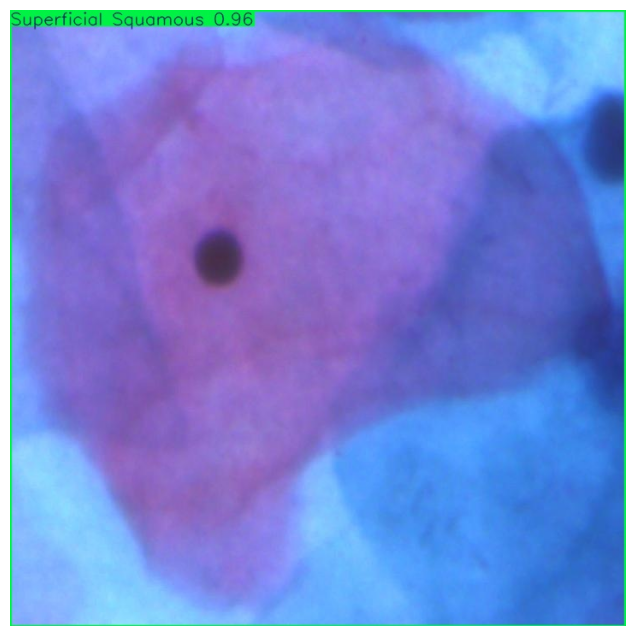

In [24]:
import cv2
import numpy as np
from google.colab import files
from ultralytics import YOLO
import matplotlib.pyplot as plt
import os
import glob

model = YOLO('/content/drive/MyDrive/CerviCure.v2i.yolov8/runs/detect/train8/weights/best.pt')

def predict_and_annotate(image_path):
    results = model.predict(source=image_path, save=True)
    save_dir = results[0].save_dir
    annotated_images = glob.glob(os.path.join(save_dir, '*.jpg'))
    if annotated_images:
        annotated_image_path = annotated_images[0]
        annotated_image = cv2.imread(annotated_image_path)
        return annotated_image
    return None

uploaded = files.upload()

for filename in uploaded.keys():
    annotated_image = predict_and_annotate(filename)
    if annotated_image is not None:
        plt.figure(figsize=(12, 8))
        plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
    else:
        print(f"Failed to process image: {filename}")
